## Arboles de decisión

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
# Nombres de las columnas
column_names = ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 
                'Magnesium', 'TotalPhenols', 'Flavanoids', 'NonflavanoidPhenols', 
                'Proanthocyanins', 'ColorIntensity', 'Hue', 'OD280_OD315', 'Proline']

In [3]:
##data = pd.read_csv('D:/UNAD/Semestre 4-6/ANÁLISIS DE DATOS - (202016908A_1394)/Etapa 2-Diseño/árboles de decisión/wine.data',  names=column_names, delimiter=',')
data = pd.read_csv('wine.data',  names=column_names, delimiter=',')

In [4]:
##with open('D:/UNAD/Semestre 4-6/ANÁLISIS DE DATOS - (202016908A_1394)/Etapa 2-Diseño/árboles de decisión/wine.names', 'r') as names_file:
with open('wine.names', 'r') as names_file:
    lines = names_file.readlines()
    info_lines = [line.strip() for line in lines if line.strip()]
info = '\n'.join(info_lines)


In [5]:
data['Info'] = info

In [6]:
data.head()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280_OD315,Proline,Info
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1. Title of Database: Wine recognition data\nU...
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1. Title of Database: Wine recognition data\nU...
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1. Title of Database: Wine recognition data\nU...
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1. Title of Database: Wine recognition data\nU...
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1. Title of Database: Wine recognition data\nU...


In [7]:
data.shape

(178, 15)

In [8]:
data.describe()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280_OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

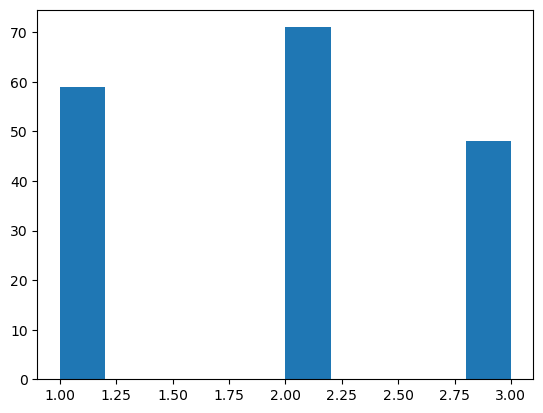

In [9]:
plt.hist(data.Class)

In [10]:
predictors_col = ["Alcohol","MalicAcid","Ash","AlcalinityOfAsh","Magnesium","TotalPhenols","Flavanoids","NonflavanoidPhenols","Proanthocyanins","ColorIntensity","Hue","OD280_OD315","Proline"]
target_col = ["Class"]

In [11]:
predictors = data[predictors_col]
target = data[target_col]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [13]:
tree = DecisionTreeClassifier()

In [14]:
arbol = tree.fit(X_train, y_train)

[Text(0.5, 0.9285714285714286, 'x[12] <= 755.0\ngini = 0.659\nsamples = 142\nvalue = [47, 56, 39]'),
 Text(0.25, 0.7857142857142857, 'x[6] <= 1.235\ngini = 0.501\nsamples = 88\nvalue = [2, 52, 34]'),
 Text(0.125, 0.6428571428571429, 'x[9] <= 3.56\ngini = 0.161\nsamples = 34\nvalue = [0, 3, 31]'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.1875, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]'),
 Text(0.375, 0.6428571428571429, 'x[9] <= 7.7\ngini = 0.172\nsamples = 54\nvalue = [2, 49, 3]'),
 Text(0.3125, 0.5, 'x[12] <= 726.5\ngini = 0.075\nsamples = 51\nvalue = [2, 49, 0]'),
 Text(0.25, 0.35714285714285715, 'x[1] <= 3.925\ngini = 0.039\nsamples = 50\nvalue = [1, 49, 0]'),
 Text(0.1875, 0.21428571428571427, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]'),
 Text(0.3125, 0.21428571428571427, 'x[1] <= 4.14\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(0.25, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.375, 0.071428571

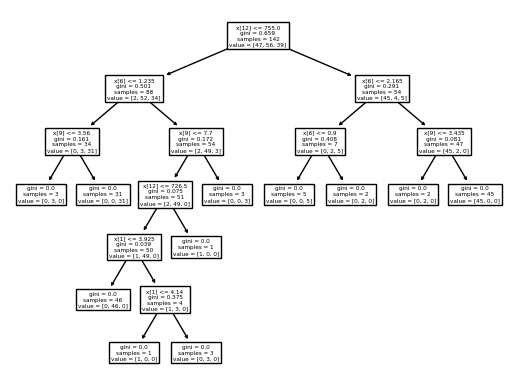

In [15]:
plot_tree(arbol)

In [16]:
predicciones = arbol.predict(X_test)

In [17]:
#Examinamos la matriz de confunsión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=["Actual"], colnames=["predicciones"])

predicciones,1,2,3
Actual,,,
1,12,0,0
2,2,13,0
3,0,2,7


In [18]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.8888888888888888

In [19]:
alcohol_means = data.groupby('Class')['Alcohol'].mean()

In [20]:
print("Nivel de alcohol por clase:")
print(alcohol_means)

Nivel de alcohol por clase:
Class
1    13.744746
2    12.278732
3    13.153750
Name: Alcohol, dtype: float64


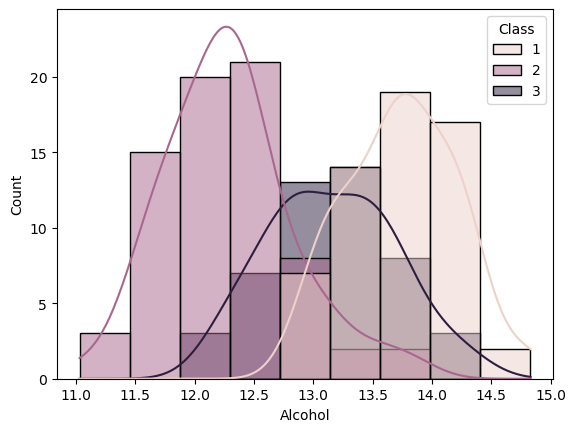

In [21]:
ax = sns.histplot(data=data, x="Alcohol", hue="Class", kde=True)